In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [155]:
df = pd.read_csv("/content/Zoo.csv")

In [5]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
df.isna()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [ ]:
give me combined plot where on x axis column on y frequency and categorize the with rows


In [12]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


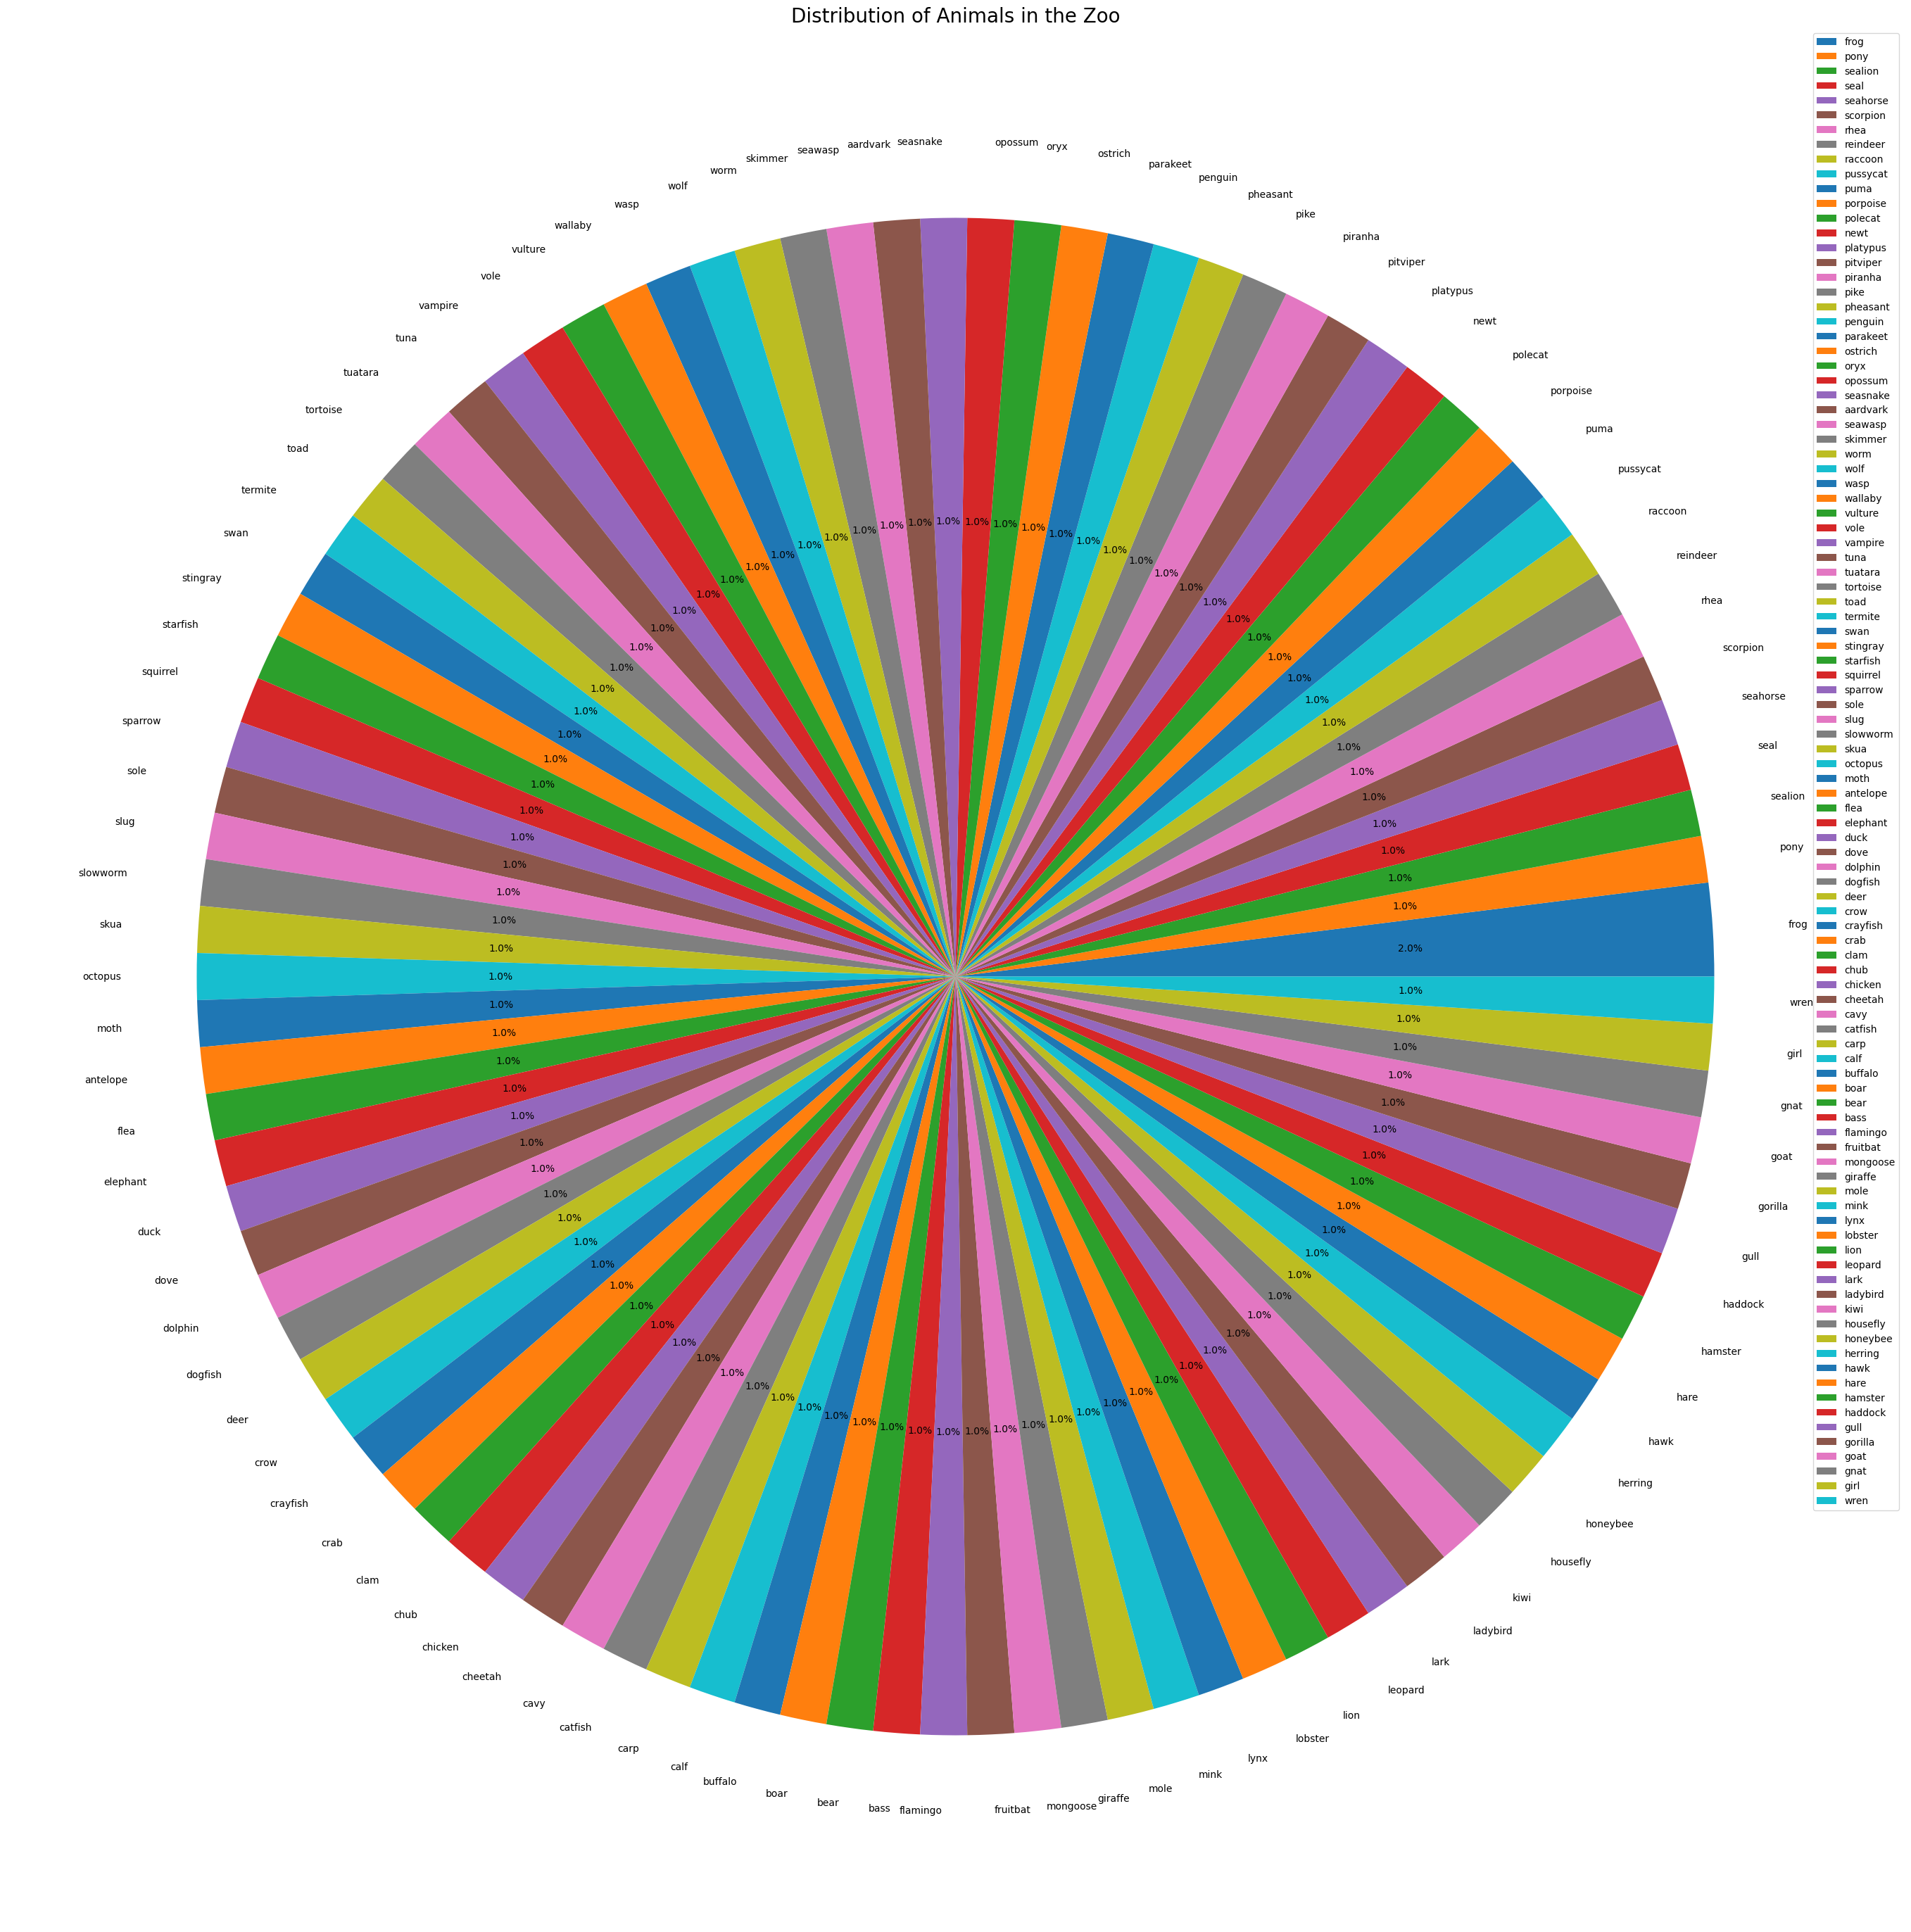

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(45, 35))

labels = df['animal name'].value_counts().index.to_list()
sizes = df['animal name'].value_counts().to_list()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Animals in the Zoo', fontsize=20)
plt.legend()
plt.show()


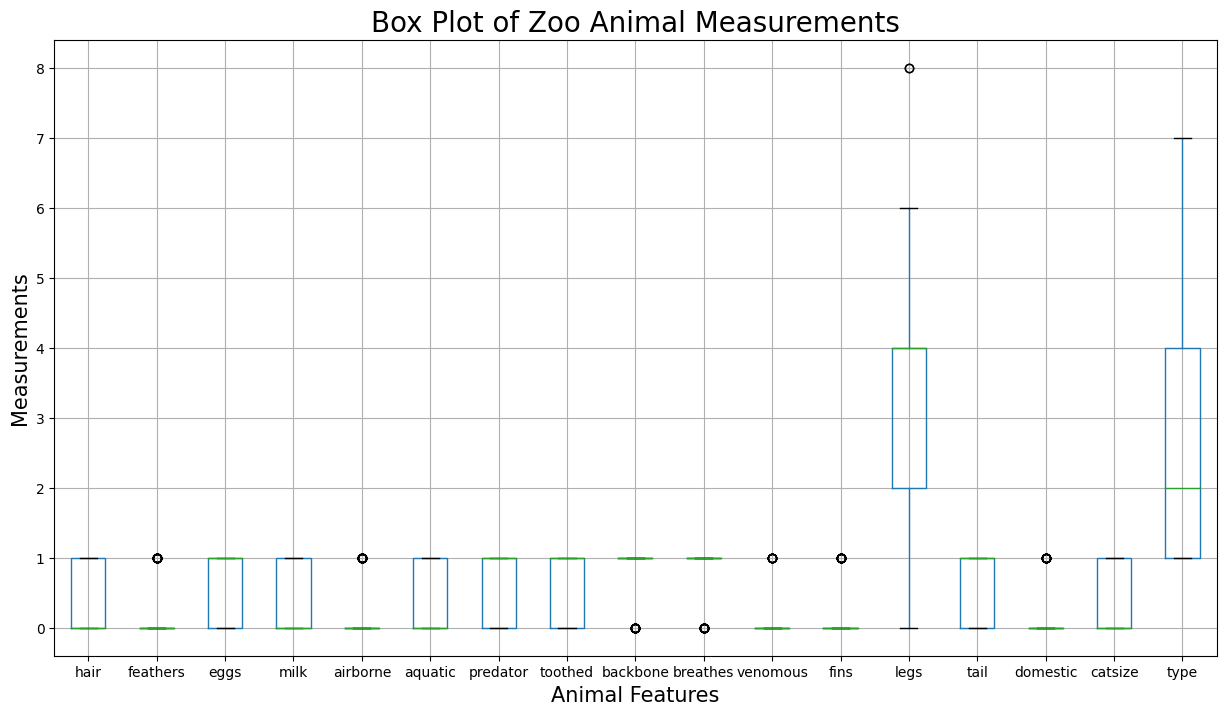

In [31]:
df.boxplot(figsize=(15, 8))
plt.title('Box Plot of Zoo Animal Measurements', fontsize=20)
plt.xlabel('Animal Features', fontsize=15)
plt.ylabel('Measurements', fontsize=15)
plt.show()


In [61]:
import pandas as pd

col = df['legs']

# Calculate Q1, Q3 and IQR
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the outliers
outliers = col[(col < lower_bound) | (col > upper_bound)]

# Print the indices of the outliers
print(outliers.index)


Int64Index([53, 72], dtype='int64')


In [65]:
df = df[df['legs'] != 53]

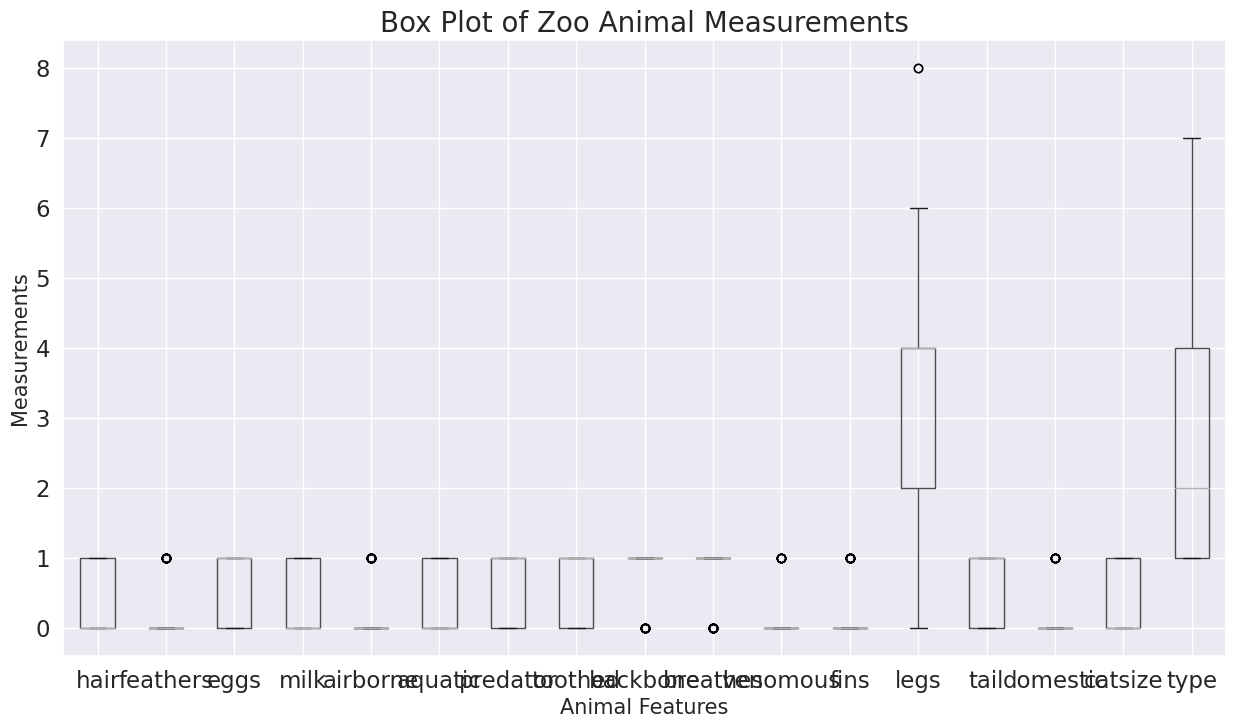

In [66]:
df.boxplot(figsize=(15, 8))
plt.title('Box Plot of Zoo Animal Measurements', fontsize=20)
plt.xlabel('Animal Features', fontsize=15)
plt.ylabel('Measurements', fontsize=15)
plt.show()

In [67]:
col = df['legs']

# Calculate Q1, Q3 and IQR
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the outliers
outliers = col[(col < lower_bound) | (col > upper_bound)]

# Print the indices of the outliers
print(outliers.index)

Int64Index([53, 72], dtype='int64')


In [69]:
# prompt: drop 53 and 73 index

df.drop([53, 73], axis=0, inplace=True)


In [71]:
col = df['legs']

# Calculate Q1, Q3 and IQR
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the outliers
outliers = col[(col < lower_bound) | (col > upper_bound)]

# Print the indices of the outliers
print(outliers.index)

Int64Index([72], dtype='int64')


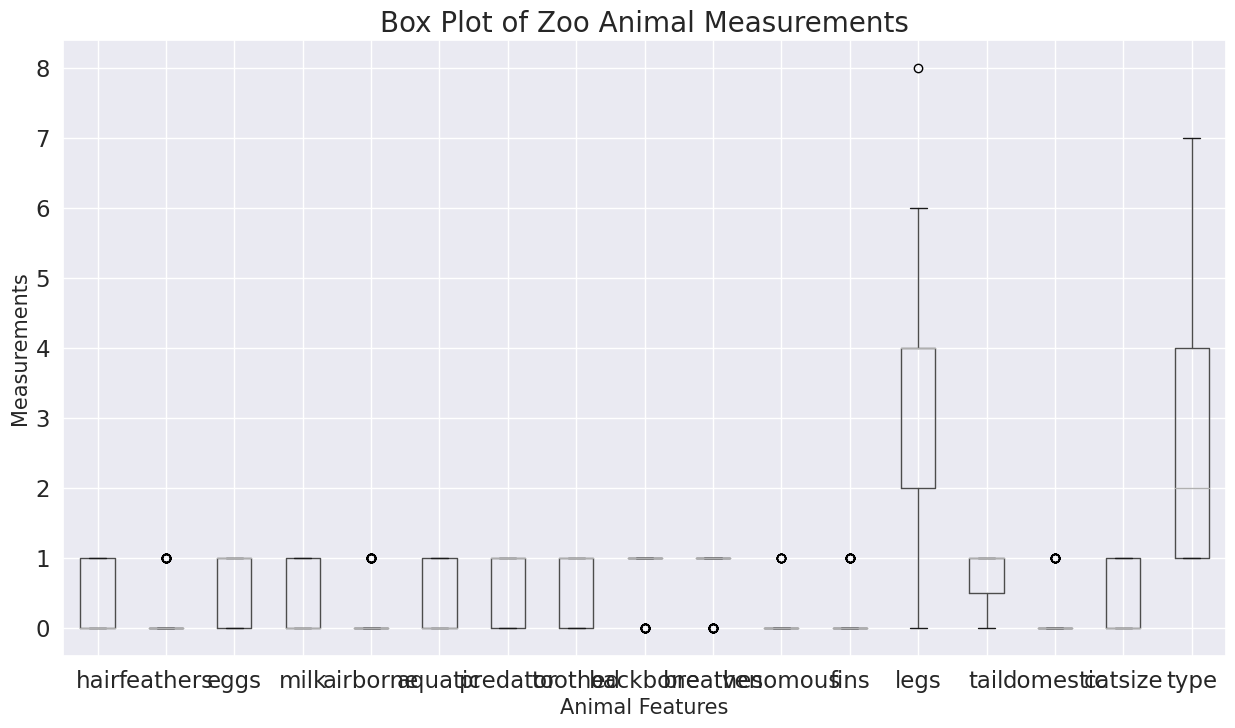

In [72]:
df.boxplot(figsize=(15, 8))
plt.title('Box Plot of Zoo Animal Measurements', fontsize=20)
plt.xlabel('Animal Features', fontsize=15)
plt.ylabel('Measurements', fontsize=15)
plt.show()

In [73]:
col = df['legs']

# Calculate Q1, Q3 and IQR
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the outliers
outliers = col[(col < lower_bound) | (col > upper_bound)]

# Print the indices of the outliers
print(outliers.index)

Int64Index([72], dtype='int64')


In [74]:
# prompt: drop 72 index

df.drop([72], axis=0, inplace=True)


In [75]:
col = df['legs']

# Calculate Q1, Q3 and IQR
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get the outliers
outliers = col[(col < lower_bound) | (col > upper_bound)]

# Print the indices of the outliers
print(outliers.index)

Int64Index([], dtype='int64')


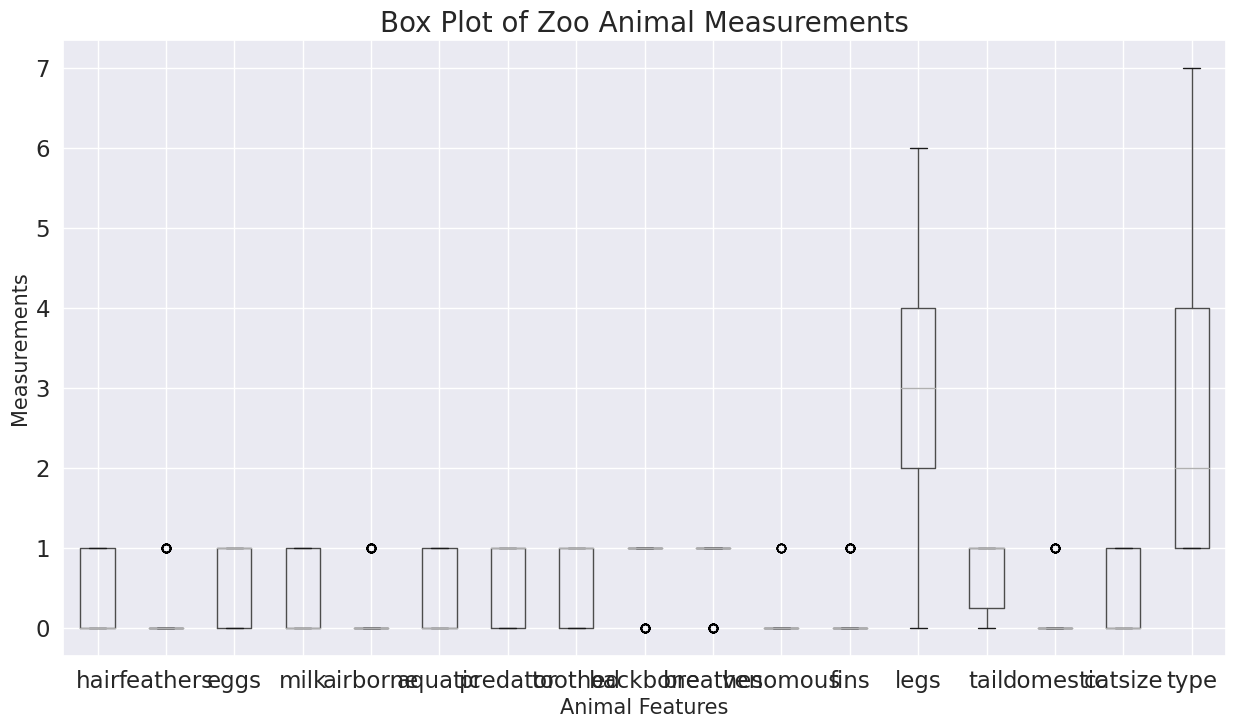

In [76]:
df.boxplot(figsize=(15, 8))
plt.title('Box Plot of Zoo Animal Measurements', fontsize=20)
plt.xlabel('Animal Features', fontsize=15)
plt.ylabel('Measurements', fontsize=15)
plt.show()

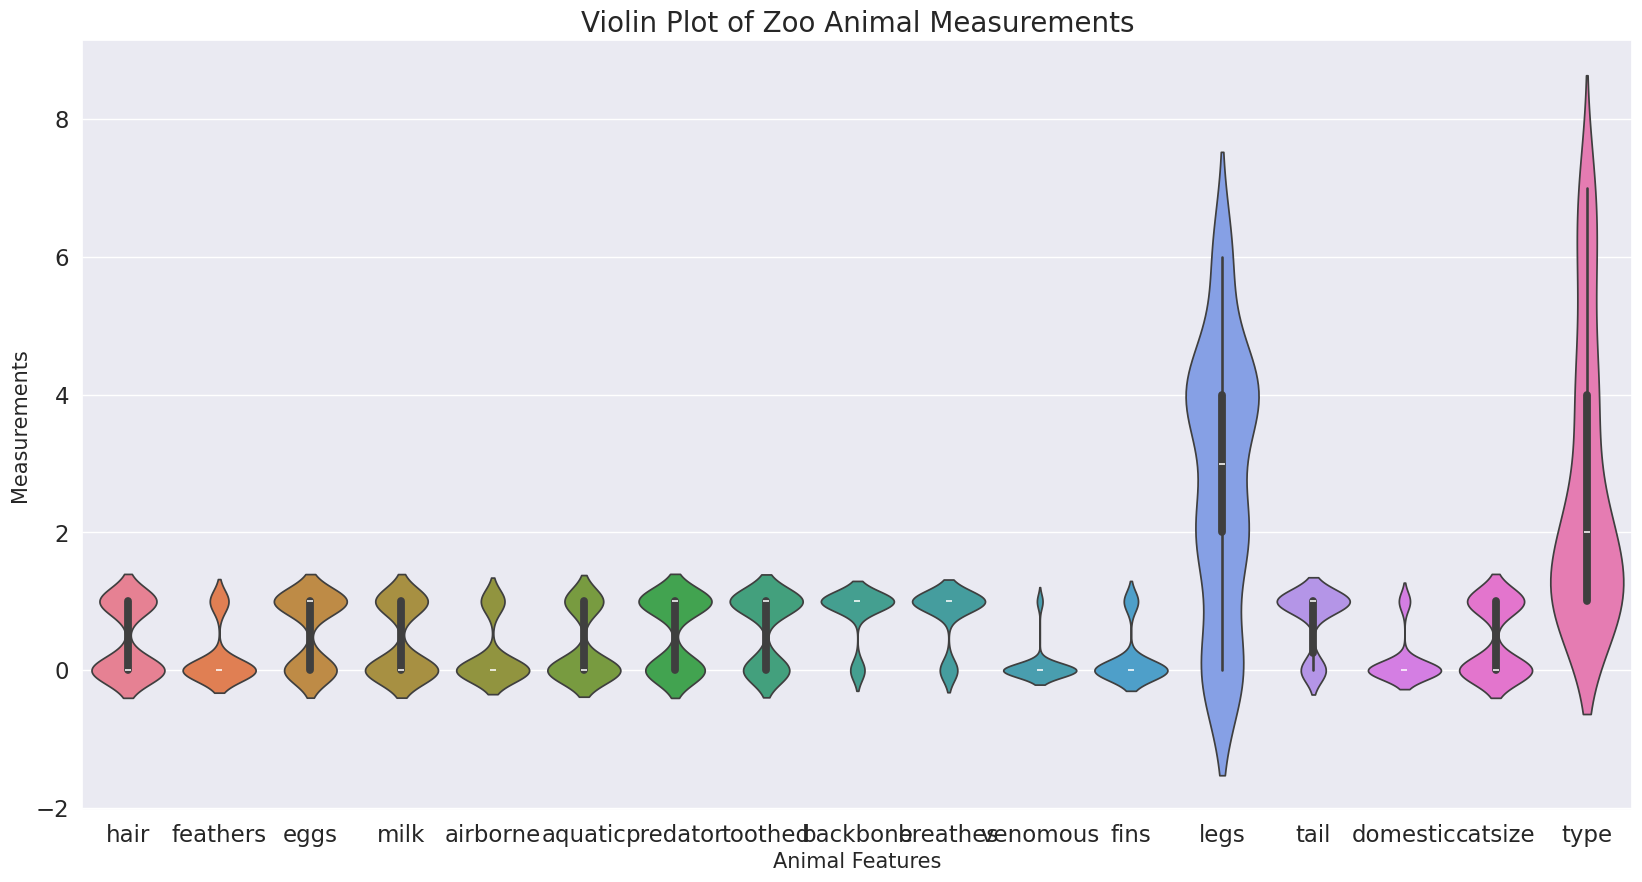

In [77]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=df)
plt.title('Violin Plot of Zoo Animal Measurements', fontsize=20)
plt.xlabel('Animal Features', fontsize=15)
plt.ylabel('Measurements', fontsize=15)
plt.show()


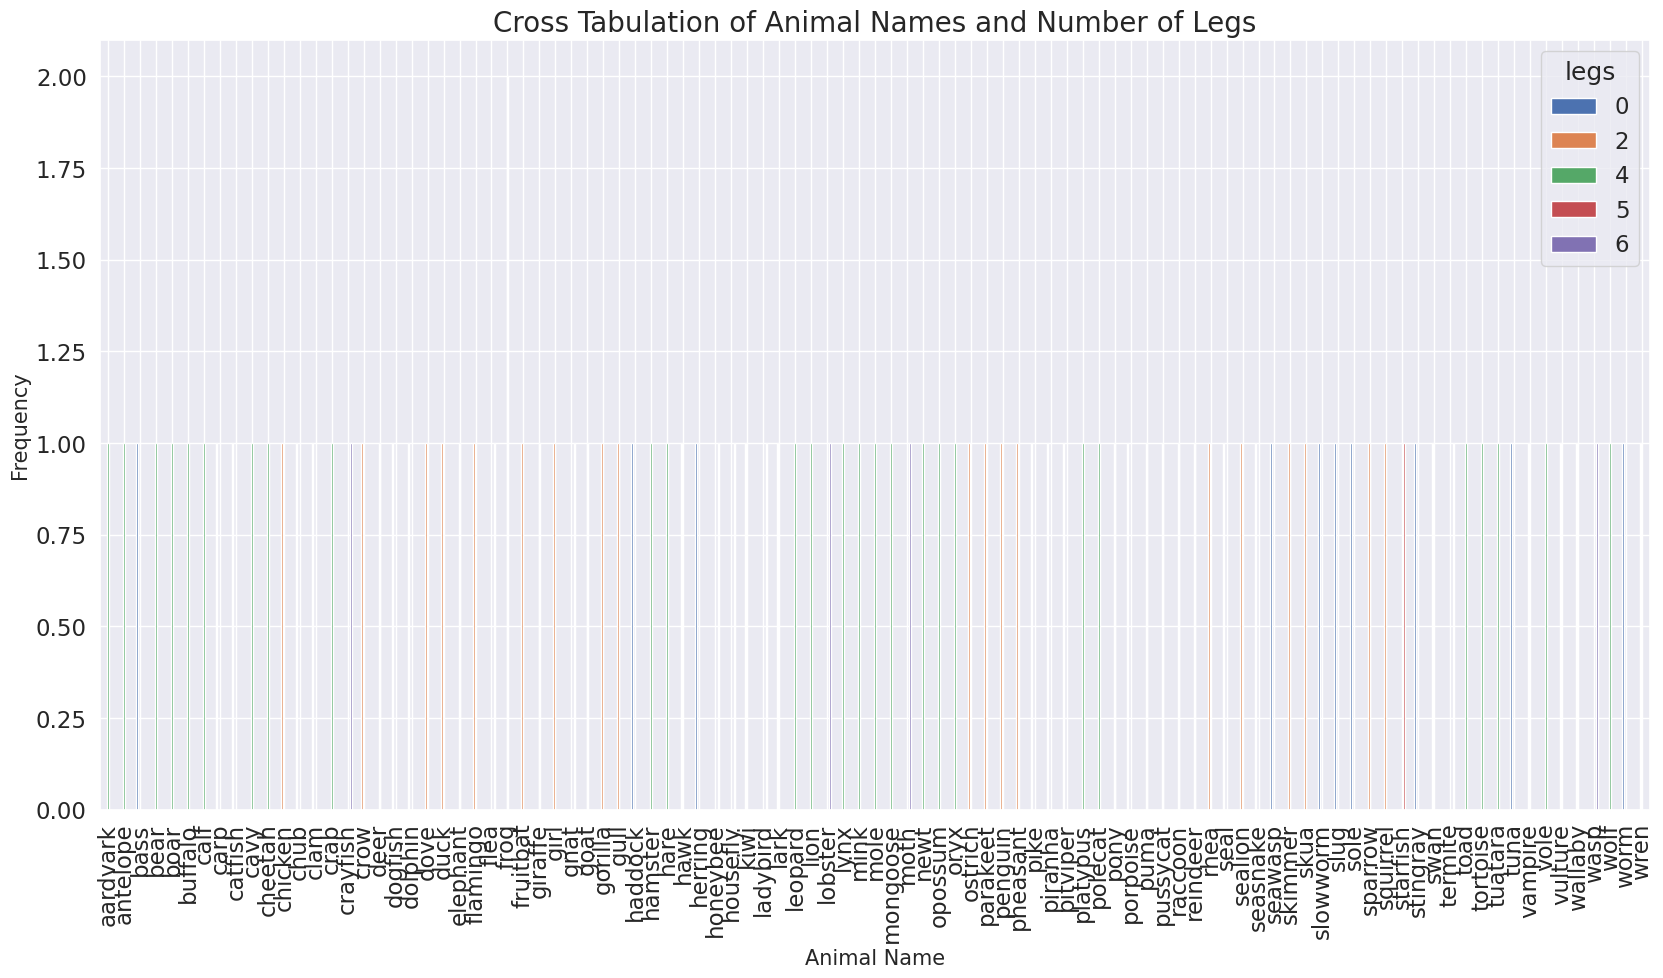

In [78]:
df_crosstab = pd.crosstab(df['animal name'], df['legs'])
df_crosstab.plot(kind="bar", figsize=(20, 10))
plt.title('Cross Tabulation of Animal Names and Number of Legs', fontsize=20)
plt.xlabel('Animal Name', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()


<ipython-input-79-f7bf9bfadcae>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



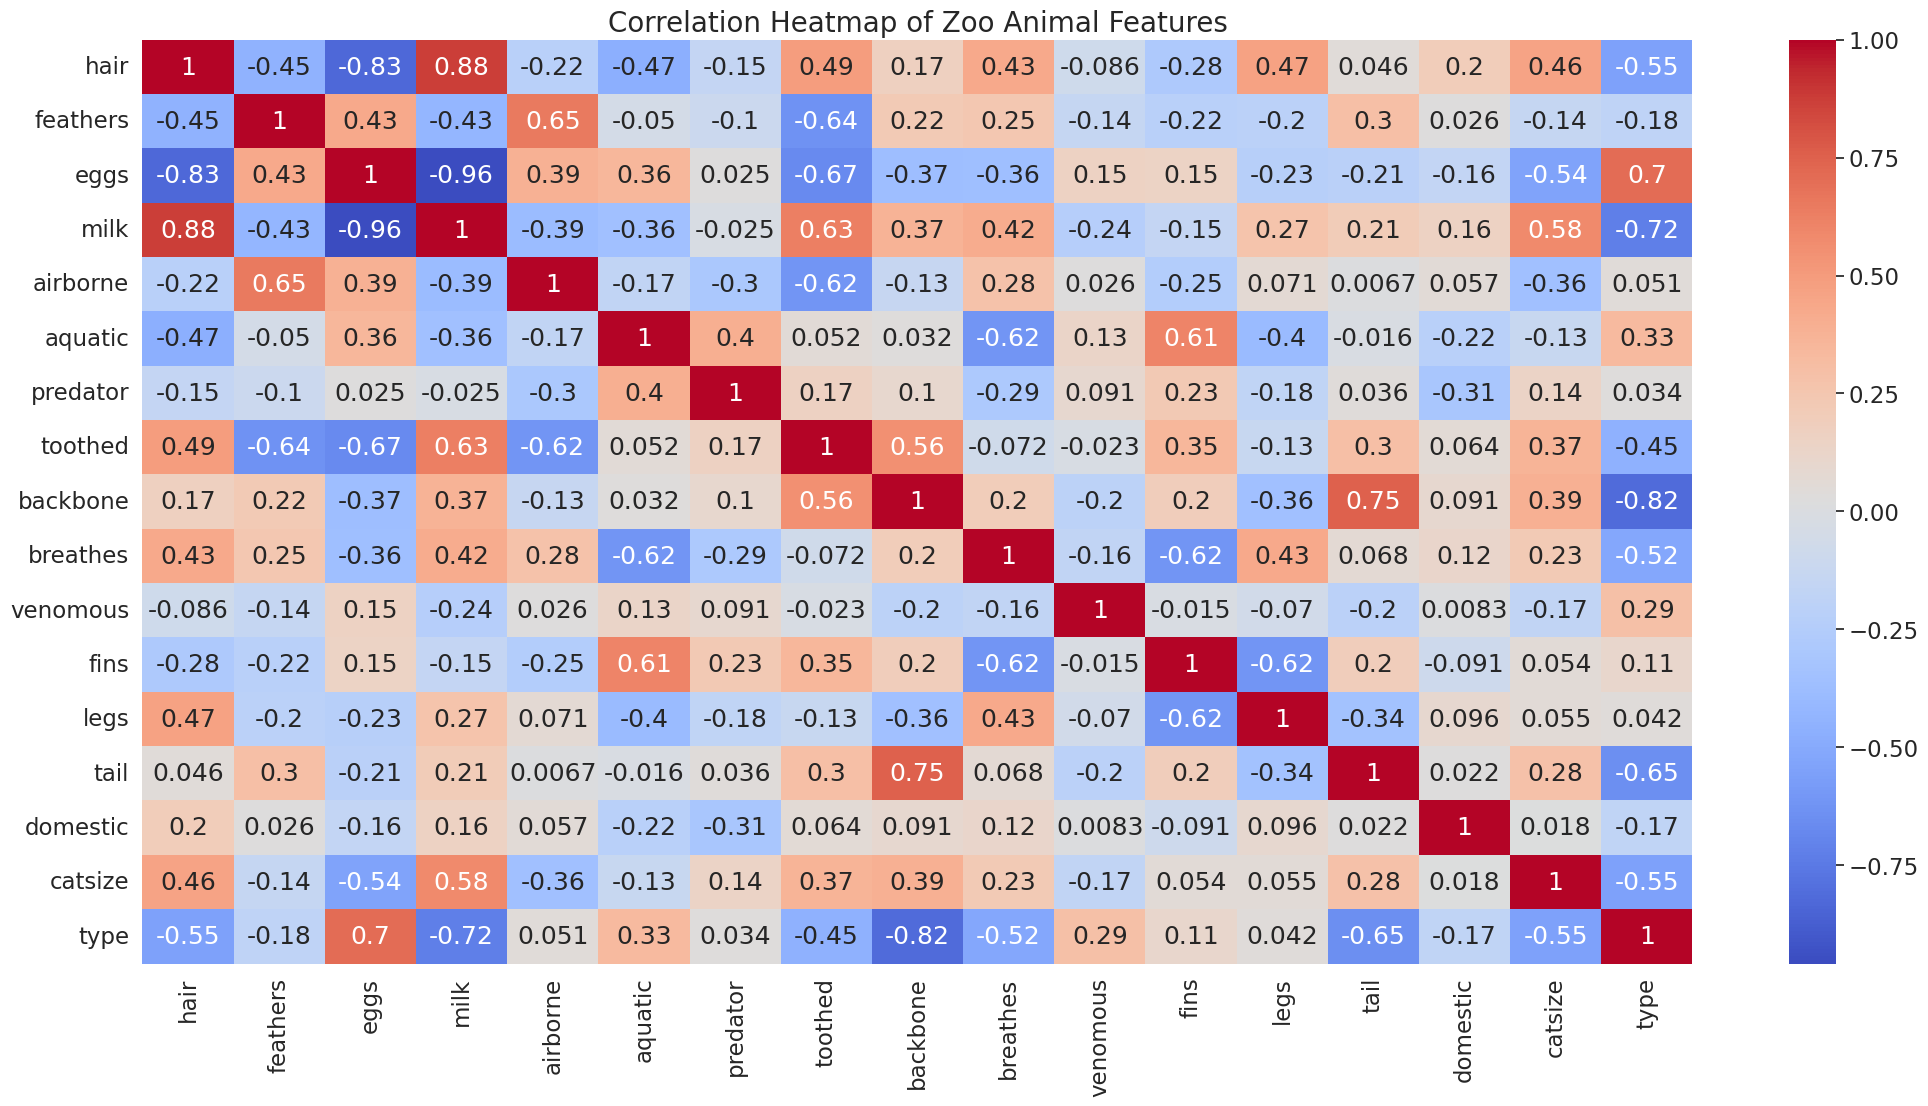

In [79]:
import seaborn as sns

plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Zoo Animal Features', fontsize=20)
plt.show()


In [80]:
!pip install plotly
import plotly.graph_objects as go

# Create data
labels = df['animal name'].value_counts().index.to_list()
parents = ['Animal'] * len(labels)
values = df['animal name'].value_counts().to_list()

# Create the sunburst chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues='total'
))

fig.update_layout(
    title='Sunburst Chart of Animal Distribution in the Zoo',
    font=dict(size=12)
)

fig.show()


In [81]:
# Create data
labels = df['animal name'].value_counts().index.to_list()
parents = ['Animal'] * len(labels)
values = df['animal name'].value_counts().to_list()

# Create the treemap
fig = go.Figure(go.Treemap(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues='total'
))

# Set the size of the treemap
fig.update_layout(
    title='Treemap of Animal Distribution in the Zoo',
    width=800,
    height=600
)

# Display the treemap
fig.show()


In [124]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [125]:
df.iloc[:, 1:17]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [126]:
## prepare the data
x = df.iloc[:, 1:17].values
y = df.iloc[:, -1].values

In [127]:
x = pd.DataFrame(x)

In [128]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
94,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
95,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
96,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [131]:
x.columns = df.columns[1:-1]
x.head()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [132]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
94,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
95,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
96,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [104]:
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2, 6, 5, 3,
       3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [105]:
y = pd.DataFrame(y)

In [133]:
x.shape

(98, 16)

In [134]:
y.shape

(98,)

In [135]:
## split the data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20)

In [136]:
## feature sscaling
scaler = StandardScaler()

In [137]:
x_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
21,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
29,1,0,0,1,0,0,1,1,1,1,0,0,2,0,1,1
54,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
93,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
91,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
61,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0
75,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0


In [138]:
scaler.fit(x_train)

StandardScaler()

In [140]:
x_train = scaler.transform(x_train)

In [141]:
x_test = scaler.transform(x_test)

In [142]:
## train the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [143]:
## make predictions
y_pred = model.predict(x_test)

In [144]:
y_pred

array([2, 1, 4, 1, 4, 2, 6, 2, 1, 1, 1, 7, 4, 1, 1, 6, 1, 6, 5, 1])

In [145]:
y_pred = pd.DataFrame(y_pred)

In [153]:
y_pred

,0
0,2
1,1
2,4
3,1
4,4
5,2
6,6
7,2
8,1
9,1


In [156]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [157]:
df_combined = pd.concat([df, y_pred], axis=1)
df_combined.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,0
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,2.0
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1.0
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4.0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1.0
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,4.0


In [171]:
df_combined.dtypes

animal name     object
hair             int64
feathers         int64
eggs             int64
milk             int64
airborne         int64
aquatic          int64
predator         int64
toothed          int64
backbone         int64
breathes         int64
venomous         int64
fins             int64
legs             int64
tail             int64
domestic         int64
catsize          int64
type             int64
0              float64
dtype: object